In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pm4py
import rotation_prediction as rp

c:\Users\Vito\miniconda3\envs\gee\Lib\site-packages\pm4py\algo\clustering\trace_attribute_driven\__init__.py:21: UserWarning: The clustering.trace_attribute_driven package will be removed in a future release.
  warnings.warn("The clustering.trace_attribute_driven package will be removed in a future release.")


In [2]:
crop_id=[ '','Corn','Cotton','Rice','Sorghum','Soybeans','Sunflower','','','','Peanuts','Tobacco','Sweet Corn','Pop or Orn Corn','Mint','','','','','','','Barley','Durum Wheat','Spring Wheat','Winter Wheat','Other Small Grains','Dbl Crop WinWht/Soybeans','Rye','Oats','Millet','Speltz','Canola','Flaxseed','Safflower','Rape Seed','Mustard','Alfalfa','Other Hay/Non Alfalfa','Camelina','Buckwheat','','Sugarbeets','Dry Beans','Potatoes','Other Crops','Sugarcane','Sweet Potatoes','Misc Vegs & Fruits','Watermelons','Onions','Cucumbers','Chick Peas','Lentils','Peas','Tomatoes','Caneberries','Hops','Herbs','Clover/Wildflowers','Sod/Grass Seed','Switchgrass','Fallow/Idle Cropland','Pasture/Grass','Forest','Shrubland','Barren','Cherries','Peaches','Apples','Grapes','Christmas Trees','Other Tree Crops','Citrus','Pecans','Almonds','Walnuts','Pears','','','','Clouds/No Data','Developed','Water','','','','Wetlands','Nonag/Undefined','','','','Aquaculture','','','','','','','','','','','','','','','','','','','Open Water','Perennial Ice/Snow','','','','','','','','','Developed/Open Space','Developed/Low Intensity','Developed/Med Intensity','Developed/High Intensity','','','','','','','Barren','','','','','','','','','','Deciduous Forest','Evergreen Forest','Mixed Forest','','','','','','','','','Shrubland','','','','','','','','','','','','','','','','','','','','','','','','Grassland/Pasture','','','','','','','','','','','','','','Woody Wetlands','','','','','Herbaceous Wetlands','','','','','','','','','Pistachios','Triticale','Carrots','Asparagus','Garlic','Cantaloupes','Prunes','Olives','Oranges','Honeydew Melons','Broccoli','Avocados','Peppers','Pomegranates','Nectarines','Greens','Plums','Strawberries','Squash','Apricots','Vetch','Dbl Crop WinWht/Corn','Dbl Crop Oats/Corn','Lettuce','Dbl Crop Triticale/Corn','Pumpkins','Dbl Crop Lettuce/Durum Wht','Dbl Crop Lettuce/Cantaloupe','Dbl Crop Lettuce/Cotton','Dbl Crop Lettuce/Barley','Dbl Crop Durum Wht/Sorghum','Dbl Crop Barley/Sorghum','Dbl Crop WinWht/Sorghum','Dbl Crop Barley/Corn','Dbl Crop WinWht/Cotton','Dbl Crop Soybeans/Cotton','Dbl Crop Soybeans/Oats','Dbl Crop Corn/Soybeans','Blueberries','Cabbage','Cauliflower','Celery','Radishes','Turnips','Eggplants','Gourds','Cranberries','','','','Dbl Crop Barley/Soybeans']

In [3]:
cdl_pth = 'Source/Data/cdl'
cdllist=[]
for i in np.arange(0,148,1):
    Lt=pd.read_hdf(cdl_pth+f'/Site{i:03}_cdl.h5').drop([2005,2006], axis=0)
    Lt['crop'] = Lt['crop'].apply(lambda x: round(x))
    cdllist.append(Lt)

In [4]:
log = rp.rotation_prediction_preprocess(cdllist, L=7, W=5, val_year=2)

c:\Users\Vito\miniconda3\envs\gee\Lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


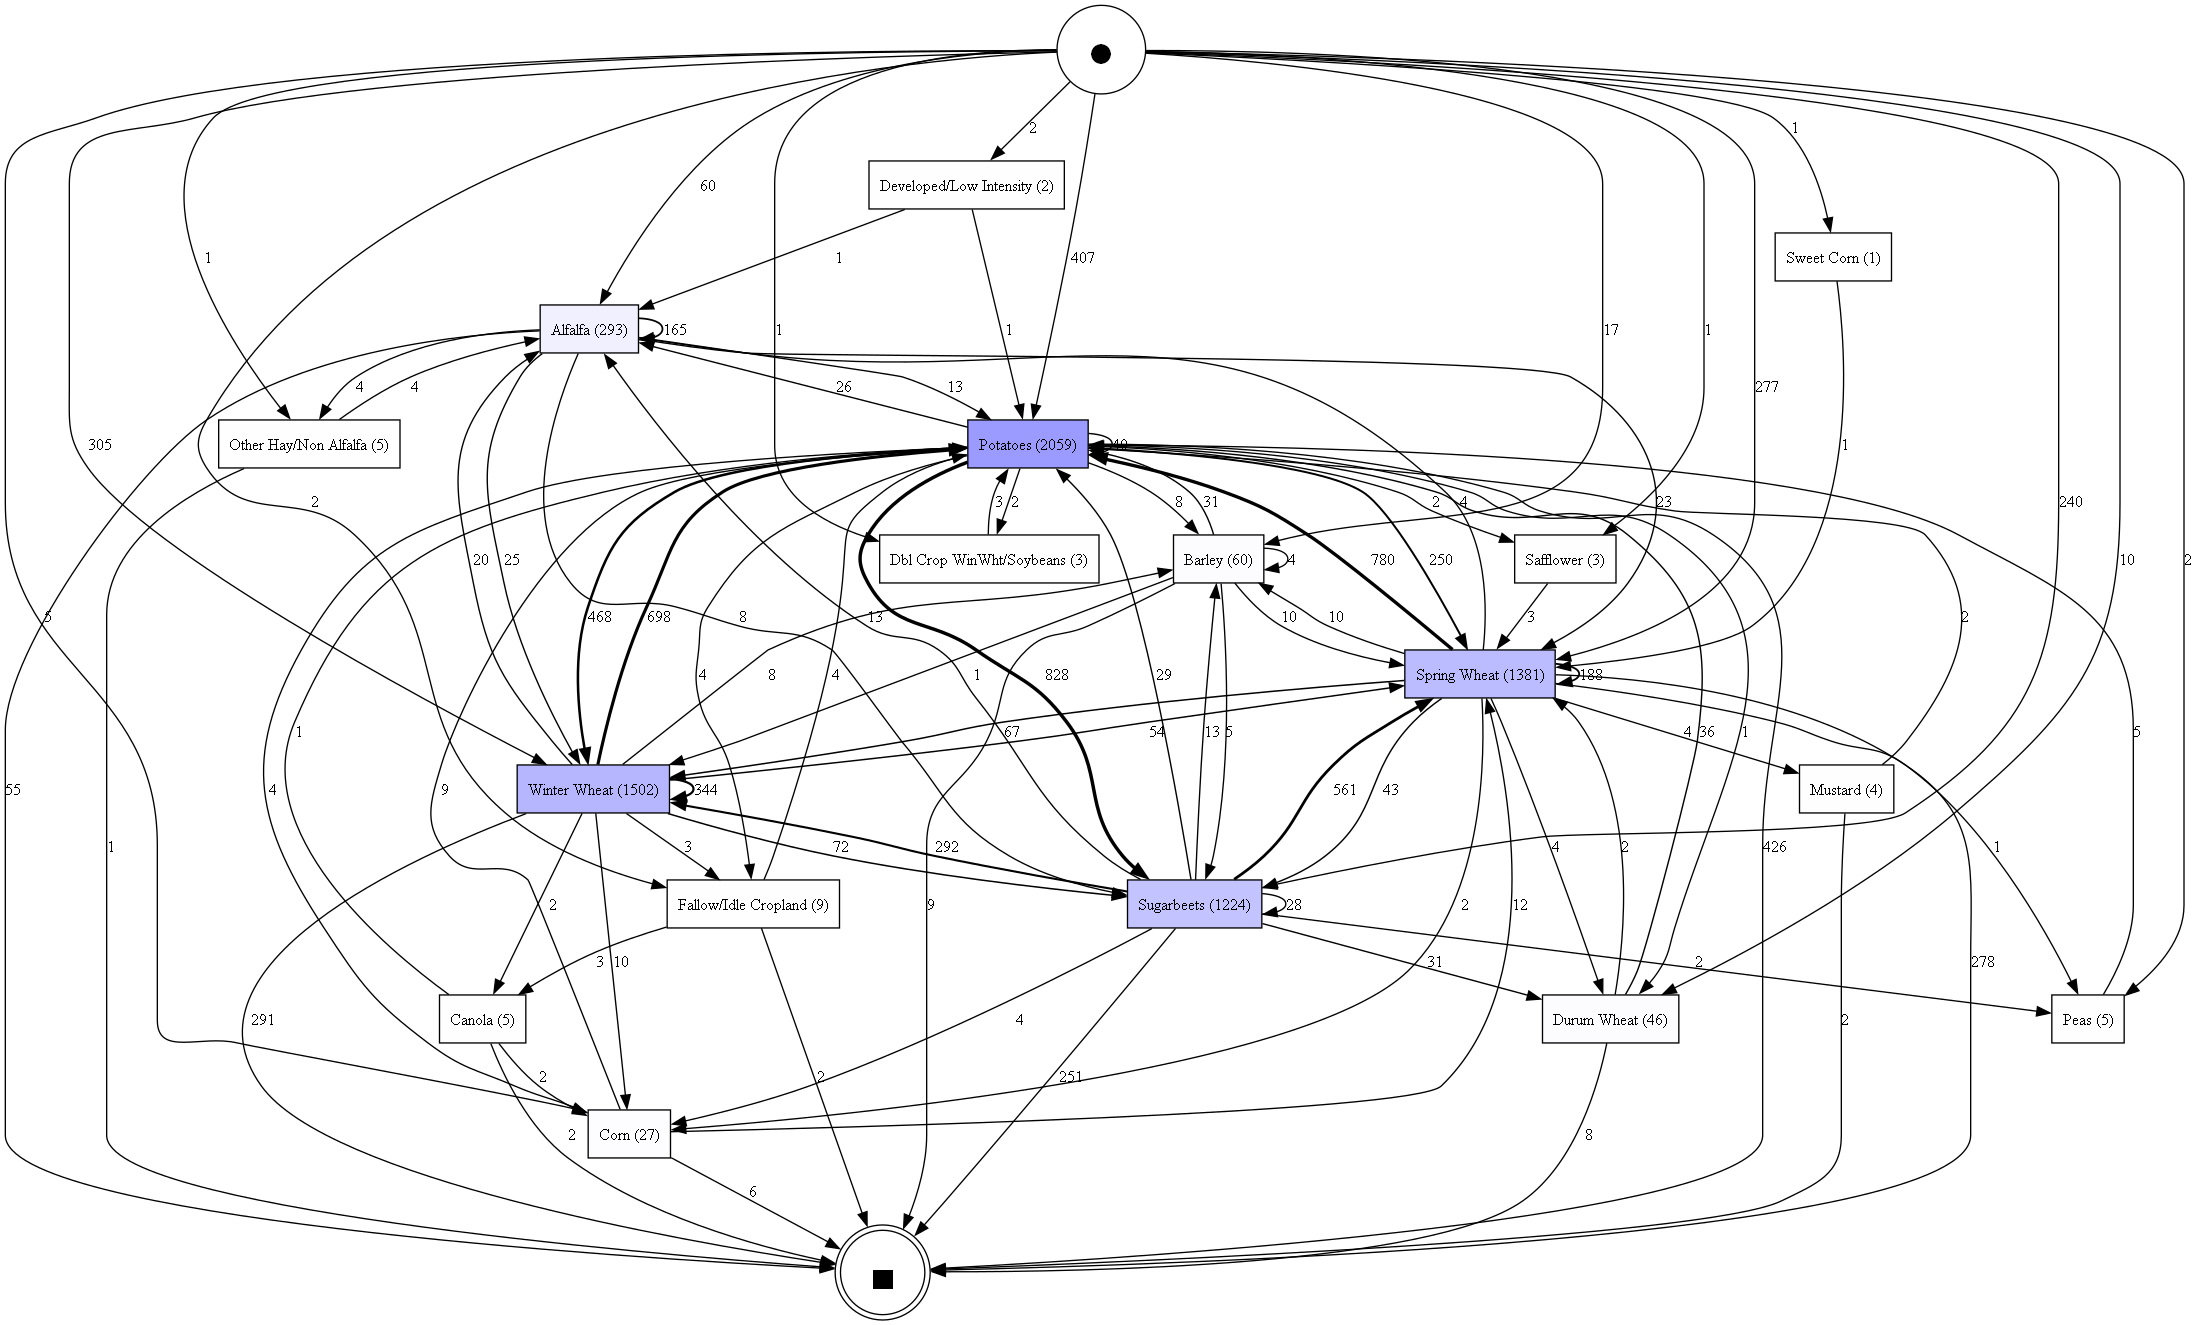

In [5]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
log2 = pm4py.filter_event_attribute_values(log, 'concept:name', '', "event",False)
dfg, start_activities, end_activities = pm4py.discover_dfg(log2)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [6]:
pm4py.save_vis_dfg(dfg, start_activities, end_activities, 'Result/dfg.pdf')

In [8]:
TM = rp.dfg_to_transition_matrix(log)

c:\Users\Vito\Documents\p1\rotation_prediction.py:40: RuntimeWarning: invalid value encountered in divide
  TM/=TM.sum(axis=1)[:,None]


In [9]:
#Assessment
for Pi, Ei in [[-2,-1],[-3,-2]]:
    prediction=rp.prediction(cdllist, TM, 3, Pi)
    rp.assessment(cdllist, prediction, 3, Ei)

Predicting: 2022
True positive found in top 3 prediction:  144
Recall:  0.972972972972973
Precision:  0.32432432432432434
True positive:
 (array(['Potatoes'], dtype='<U8'), array([144], dtype=int64))
Prediction:
 (array(['', 'Alfalfa', 'Dbl Crop Barley/Soybeans', 'Forest', 'Potatoes',
       'Spring Wheat', 'Sugarbeets', 'Winter Wheat'], dtype='<U27'), array([  2,   2,   7,   4, 144,  67,  78, 140], dtype=int64))
---------------------------------------------------------------
Predicting: 2021
True positive found in top 3 prediction:  131
Recall:  0.8851351351351351
Precision:  0.29504504504504503
True positive:
 (array(['Alfalfa', 'Potatoes', 'Spring Wheat', 'Winter Wheat'],
      dtype='<U12'), array([ 2,  1, 52, 76], dtype=int64))
Prediction:
 (array(['Alfalfa', 'Dbl Crop Barley/Soybeans', 'Durum Wheat', 'Potatoes',
       'Spring Wheat', 'Sugarbeets', 'Winter Wheat'], dtype='<U27'), array([  4,   2,  69,  67, 106,  50, 146], dtype=int64))
--------------------------------------------